In [1]:
#step 1
#import modules
import model
import preprocessing as pre
import get_data
import cv2
from matplotlib import pyplot as plt
import random
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import keras.backend as K
import pandas as pd
import predict
import os
from keras.optimizers import Adam, SGD
import other as o
import split_data


2400


In [2]:
#step 2
#dataset directory & preprocessed dataset directory
data_dir = 'dataset/input/insects'
preprocessed_dir = 'dataset/preprocessed_input'

In [3]:
#step 3
labels = get_data.get_label(data_dir)
IMG_SIZE = 224

In [ ]:
#sync.synchronize_data(preprocessed_dir, labels)

In [ ]:
test_img = cv2.imread(data_dir+'/Butterfly/Butterfly_16.jpg')
plt.imshow(test_img)
print(test_img.shape[:2])

In [ ]:
test_result = pre.preprocessing_img(test_img, IMG_SIZE)
plt.imshow(test_result)
print(test_result.shape[:2])

In [ ]:
#save preprocessed data
print('Preprocessing Progress')
o.preprocess_progress(data_dir, preprocessed_dir, labels, IMG_SIZE)

In [ ]:
#step 4
#rotate each images in preprocessed data into 3 new images (rotate 90 degree, 180 degree and 270 degree)
#print('Rotate Progress')
#o.rotate_progress(preprocessed_dir, labels)
        
#synchronize data in preprocess data folder
print('Synchronize Progress')
o.synchronize_progress(preprocessed_dir, labels)

In [4]:
#step 5
data = get_data.get_data(preprocessed_dir, labels)
print(len(data))

2400


In [5]:
#step 6
#import class mapping
l = []
for i in data:
    l.append(labels[i[1]])

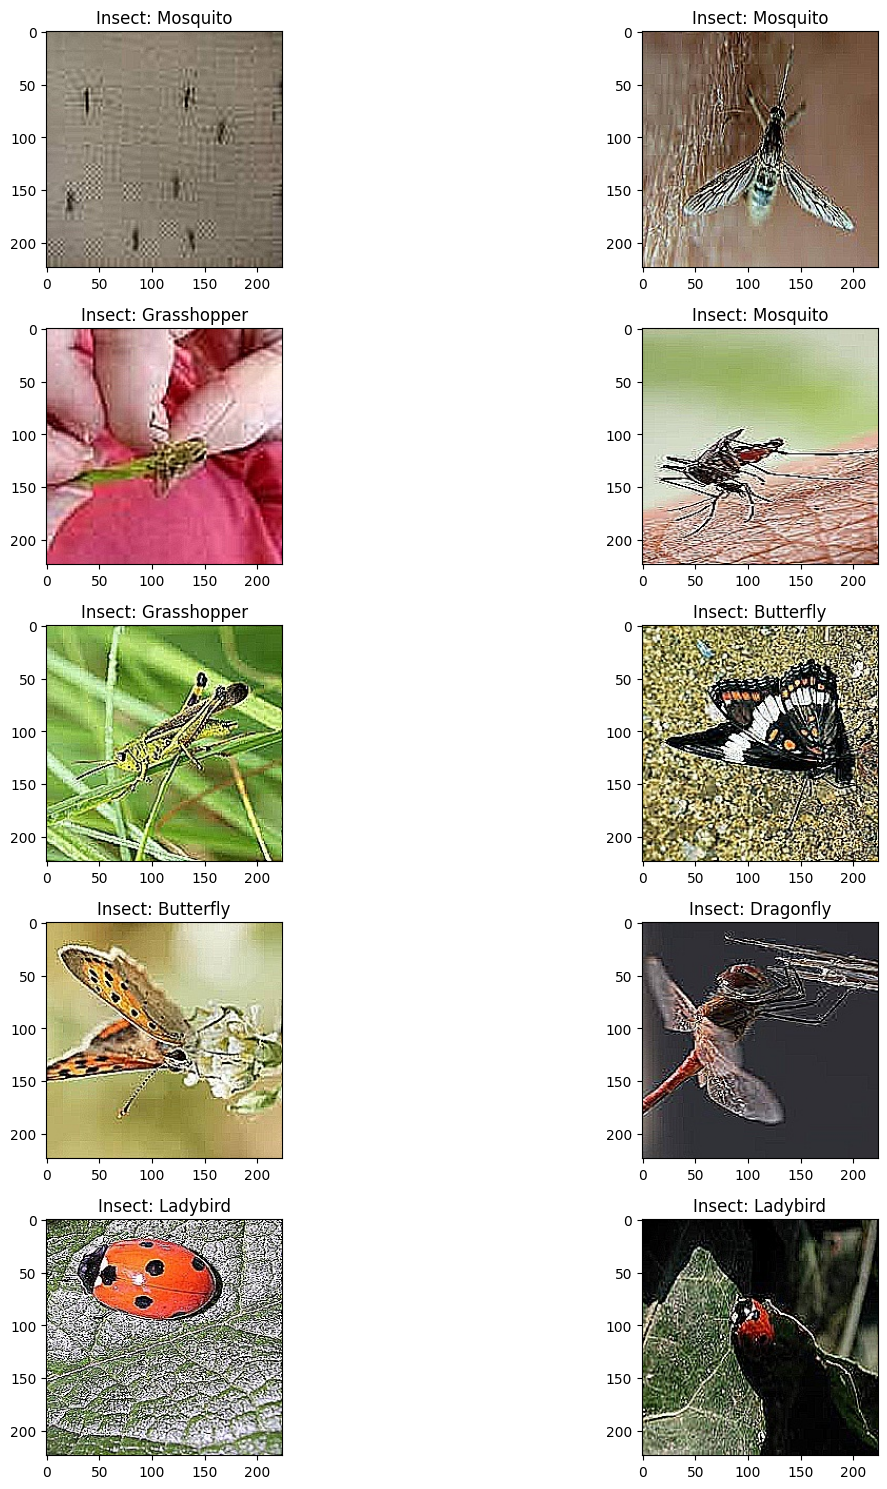

In [6]:
#step 7
#show 10 samples
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(data))
        ax[i,j].imshow(data[l][0][:,:,::-1])
        ax[i,j].set_title('Insect: '+labels[data[l][1]])

plt.tight_layout()

In [7]:
#step 8
x = []
y = []
# x array is set of image features
# y array is set of labels 
for feature, label in data:
    x.append(feature)
    y.append(label)

In [8]:
#step 9
# Normalize the data

x = np.array(x)
y = np.array(y)

In [9]:
#step 10
#divide data into 3 parts with the ratios
#training = 0.6, validation = 0.2, testing = 0.2
train_ratio = 0.6
valid_ratio = 0.2
test_ratio = 0.2

image_train_val, image_test, label_train_val, label_test = train_test_split(x, y, test_size=test_ratio,  stratify = y , random_state = 0)
remaining_ratio = valid_ratio / (train_ratio + valid_ratio)
image_train, image_val, label_train, label_val = train_test_split(image_train_val, label_train_val, test_size=remaining_ratio, stratify=label_train_val, random_state=0)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


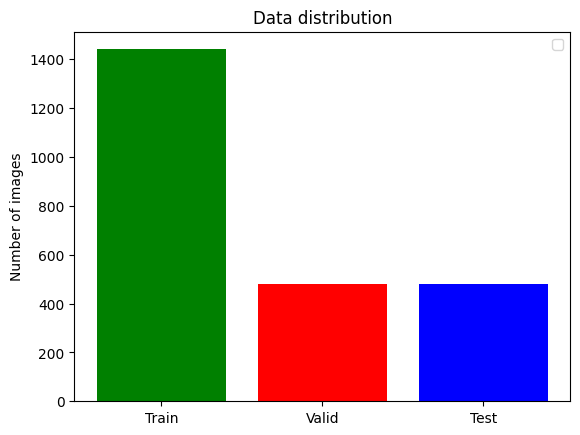

In [10]:
split_data.show_data_distribution(image_train, image_val, image_test)

In [11]:
#step 11
del x,y,data

In [12]:
#step 12
#build VGG19 model to train data
#model = model.build_VGG19(IMG_SIZE)
#build ResNet101V2
model = model.build_ResNet101V2(IMG_SIZE)
#build RetinaNet
#model = model.build_RetinaNet(IMG_SIZE)

#optimizer = SGD(momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 7, 7, 2048)        42626560  
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 2048)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 5)                 92165     
                                                                 
Total params: 42,718,725
Trainable params: 42,621,061
Non-trainable params: 97,664
_________________________________________________________________


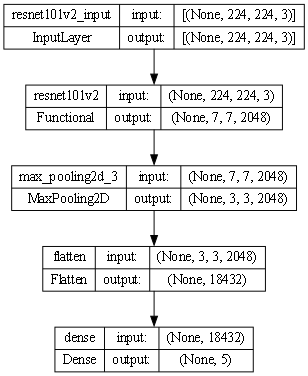

In [13]:
#step 13
from keras.utils import plot_model
#show plot model
plot_model(model,
           show_shapes = True,
           show_dtype=False,
           show_layer_names = True,
           rankdir = 'TB',
           expand_nested = False,
           dpi = 70)

In [14]:
#step 14
#log file & saved model file directory
log_dir= 'training1.log'
model_dir= 'model1.h5'

In [15]:
#step 15
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import CSVLogger
# setup callbacks and log saving
csv_logger = CSVLogger(log_dir, separator = ',', append = False)
learning_rate_reduction = [ReduceLROnPlateau(monitor='val_loss',
                                                             patience = 2, verbose=1,factor=0.2, min_lr=1e-12),
                           csv_logger]


In [16]:
#step 16
epoch = 100

K.clear_session()

model.fit(image_train, label_train, batch_size = 64 , epochs = epoch , validation_data = (image_val, label_val), callbacks = [learning_rate_reduction])
model.save(model_dir)


Epoch 1/100
23/23 [==============================] - 861s 37s/step - loss: 2.0461 - accuracy: 0.5181 - val_loss: 239.0093 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 2/100
23/23 [==============================] - 851s 37s/step - loss: 0.7592 - accuracy: 0.7542 - val_loss: 19.1007 - val_accuracy: 0.2396 - lr: 0.0010
Epoch 3/100
23/23 [==============================] - 893s 39s/step - loss: 0.4566 - accuracy: 0.8500 - val_loss: 13.3574 - val_accuracy: 0.3396 - lr: 0.0010
Epoch 4/100
23/23 [==============================] - 1014s 44s/step - loss: 0.2126 - accuracy: 0.9312 - val_loss: 3.0602 - val_accuracy: 0.4146 - lr: 0.0010
Epoch 5/100
23/23 [==============================] - 869s 38s/step - loss: 0.1187 - accuracy: 0.9646 - val_loss: 2.4131 - val_accuracy: 0.5771 - lr: 0.0010
Epoch 6/100
23/23 [==============================] - 822s 36s/step - loss: 0.1047 - accuracy: 0.9646 - val_loss: 2.0784 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 7/100
15/23 [==================>...........] - ETA: 4

In [ ]:
# try this code to continue to train when you have log file and model file
# when you go on training model, you needn't to execute above block of code
'''
model = tf.keras.models.load_model(model_dir, compile = False)


log_file_path = log_dir
with open(log_file_path, 'r') as f:
    log_data = f.readlines()

loss_values = []
accuracy_values = []

for line in log_data:
    if 'Epoch' in line and 'loss:' in line and 'accuracy:' in line:
        epoch = int(line.split('Epoch ')[-1].split(' -')[0])
        loss = float(line.split('loss: ')[-1].split(' -')[0])
        accuracy = float(line.split('accuracy: ')[-1].strip())
        loss_values.append(loss)
        accuracy_values.append(accuracy)

initial_epoch = len(loss_values)
epoch2 = initial_epoch + 25
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

csv_logger = CSVLogger(log_dir, separator = ',', append = True)
learning_rate_reduction = [keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                             patience = 2, verbose=1,factor=0.2, min_lr=0.00000001),
                           csv_logger]
K.clear_session()

model.fit(image_train, label_train, initisl_epoch=initial_epoch, batch_size = 64 , epochs = epoch , validation_data = (image_val, label_val), callbacks = [learning_rate_reduction])
model.save(model_dir)
'''

In [ ]:
#step 18
model = tf.keras.models.load_model(model_dir, compile = False)
history = pd.read_csv(log_dir, sep =',', engine = 'python')

hist = history

acc=hist['accuracy']
val_acc=hist['val_accuracy']

epoch=range(len(acc))

loss=hist['loss']
val_loss=hist['val_loss']

f,ax=plt.subplots(2,1,figsize=(16,16))
ax[0].set_title('Model Accuracy')
ax[0].plot(epoch,acc,'b',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'r',label='Validation Accuracy')
ax[0].legend()

ax[1].set_title('Model Loss')
ax[1].plot(epoch,loss,'b',label='Training Loss')
ax[1].plot(epoch,val_loss,'r',label='Validation Loss')
ax[1].legend()
'''
ax[2].set_title('Model Mean IOU')
ax[2].plot(epoch,hist['mean_io_u'],'b',label='Training Mean IOU')
ax[2].plot(epoch,hist['val_mean_io_u'],'r',label='Validation Mean IOU')
ax[2].legend()
'''
plt.show()

In [ ]:
#step 19
#predict 5 random samples
model = tf.keras.models.load_model(model_dir, compile = False)
p1=predict.predict(get_data.get_random_file(data_dir+'/Butterfly'),model)
p2=predict.predict(get_data.get_random_file(data_dir+'/Dragonfly'),model)
p3=predict.predict(get_data.get_random_file(data_dir+'/Grasshopper'),model)
p4=predict.predict(get_data.get_random_file(data_dir+'/Ladybird'),model)
p5=predict.predict(get_data.get_random_file(data_dir+'/Mosquito'),model) 

In [ ]:
#step 20
conf_mat = np.array([p1[0][0:5], p2[0][0:5], p3[0][0:5], p4[0][0:5], p5[0][0:5]])
predict.confusion_matrix(conf_mat)

In [ ]:
#step 21
#evaluate model
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

result = model.evaluate(image_test, label_test)
print("Loss of model is: ", result[0])
print("Accuracy of the model is: " , result[1]*100 , "%")